<a href="https://colab.research.google.com/github/shhh-33/sesac-python/blob/shhh/0317_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%run my_init.py

Mounted at /content/drive


In [2]:
%matplotlib inline

### 데이터 준비하기

In [3]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [4]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [5]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [6]:
fish_data = [(l, w) for l, w in zip(length, weight)]

In [7]:
fish_target = [1] * 35 + [0] * 14

In [8]:
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

### 훈련하기

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

KNeighborsClassifier()

### 평가하기

In [10]:
# kn.score(test_input, test_target)
accuracy_score(test_target, kn.predict(test_input))

0.0

### numpy 연습

In [11]:
np.random.seed(42)
X = np.random.randint(1, 100, 15).reshape(3, -1)
X

array([[52, 93, 15, 72, 61],
       [21, 83, 87, 75, 75],
       [88, 24,  3, 22, 53]])

In [12]:
X.shape

(3, 5)

In [13]:
X.sum()

824

In [14]:
X.sum(axis=0)

array([161, 200, 105, 169, 189])

In [15]:
X.sum(axis=1)

array([293, 341, 190])

### 샘플링 편향 해결하기

In [16]:
np.random.seed(42)
index = np.arange(49)
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [17]:
np.random.shuffle(index)
index

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2, 37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [18]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [19]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [20]:
train_input.shape, train_target.shape

((35, 2), (35,))

In [21]:
test_input.shape, test_target.shape

((14, 2), (14,))

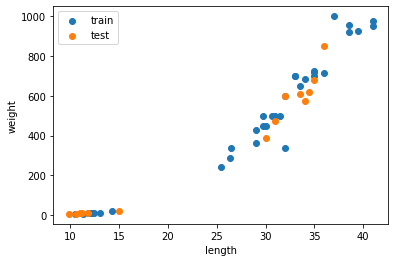

In [22]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.legend(['train', 'test'])
plt.show()

In [23]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [24]:
accuracy_score(test_target, kn.predict(test_input))

1.0

### Quartile Range

In [25]:
np.random.seed(42)
arr = np.random.randint(1, 101, 100)
arr

array([ 52,  93,  15,  72,  61,  21,  83,  87,  75,  75,  88, 100,  24,
         3,  22,  53,   2,  88,  30,  38,   2,  64,  60,  21,  33,  76,
        58,  22,  89,  49,  91,  59,  42,  92,  60,  80,  15,  62,  62,
        47,  62,  51,  55,  64,   3,  51,   7,  21,  73,  39,  18,   4,
        89,  60,  14,   9,  90,  53,   2,  84,  92,  60,  71,  44,   8,
        47,  35,  78,  81,  36,  50,   4,   2,   6,  54,   4,  54,  93,
        63,  18,  90,  44,  34,  74,  62, 100,  14,  95,  48,  15,  72,
        78,  87,  62,  40,  85,  80,  82,  53,  24])

In [26]:
Q = np.percentile(arr, [25, 50, 75])
Q

array([23.5, 54. , 76.5])

In [27]:
q1, q2, q3 = Q[0], Q[1], Q[2]

In [28]:
IQR = q3 - q1

In [29]:
lfence = q1 - 1.5 * IQR
lfence

-56.0

In [30]:
ufence = q3 + 1.5 * IQR
ufence

156.0

In [31]:
arr[30] = 200

In [32]:
(arr < lfence) | (arr > ufence)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [33]:
outliers = arr[(arr < lfence) | (arr > ufence)]
outliers

array([200])

In [34]:
normal = arr[(arr >= lfence) & (arr <= ufence)]
normal

array([ 52,  93,  15,  72,  61,  21,  83,  87,  75,  75,  88, 100,  24,
         3,  22,  53,   2,  88,  30,  38,   2,  64,  60,  21,  33,  76,
        58,  22,  89,  49,  59,  42,  92,  60,  80,  15,  62,  62,  47,
        62,  51,  55,  64,   3,  51,   7,  21,  73,  39,  18,   4,  89,
        60,  14,   9,  90,  53,   2,  84,  92,  60,  71,  44,   8,  47,
        35,  78,  81,  36,  50,   4,   2,   6,  54,   4,  54,  93,  63,
        18,  90,  44,  34,  74,  62, 100,  14,  95,  48,  15,  72,  78,
        87,  62,  40,  85,  80,  82,  53,  24])